# 画像メディア工学１０回目
## 10. ディープラーニングでステレオマッチング（３次元復元）

様々な手法があるが，ここでは[Pyramid Stereo Matching Network](https://arxiv.org/abs/1803.08669) (PSMNet) を利用してみる．

※ このプログラムは，Sonyのディープラーニングライブラリ[Neural Network Libraries (nnabla)](https://github.com/sony/nnabla/)の[PSMNetのサンプルプログラム](https://colab.research.google.com/github/sony/nnabla-examples/blob/master/interactive-demos/psmnet.ipynb) を参考にしています．また，PSMNet以外にも様々なサンプルが用意されています (https://github.com/sony/nnabla-examples)

## 準備の前に

Colabでは，`!cat /etc/os-release` といった形で，先頭に`!`をつけることで，シェルコマンド（Linuxのコマンド）を実行できる．

`!cat /etc/os-release`と実行すると，OS情報が表示される．以下の場合，Ubuntu 18.04.5 LTSであることがわかる．

In [1]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


## 前準備
Colabにはnnablaがインストールされていないため，インストールする．

その後，PSMNetのプログラムと必要なファイルを実行場所にコピーする．

（ただし，セッションが切れると再インストールが必要になります）

また，以下のプログラムを実行する際は，メニューの「ランタイム」→「ランタイムのタイプを変更」を開き、ハードウェアアクセラレータをGPUに設定してください．

In [2]:
!pip install nnabla-ext-cuda100
!git clone https://github.com/sony/nnabla-examples.git
%cp nnabla-examples/stereo-depth/PSMnet/inference.py .
%cp nnabla-examples/stereo-depth/PSMnet/stackhourglass.py .

     |████████████████████████████████| 47.4 MB 1.4 MB/s 
     |████████████████████████████████| 18.6 MB 1.4 MB/s 
     |████████████████████████████████| 131 kB 48.4 MB/s 
     |████████████████████████████████| 8.4 MB 32.3 MB/s 
     |████████████████████████████████| 79 kB 7.0 MB/s 
     |████████████████████████████████| 138 kB 46.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Cloning into 'nnabla-examples'...
remote: Enumerating objects: 6736, done.
remote: Counting objects: 100% (2501

学習済みモデル（重み）をダウンロード．

In [3]:
!wget https://nnabla.org/pretrained-models/nnabla-examples/stereo-depth/psmnet_trained_sceneflow.h5

--2021-12-15 03:17:57--  https://nnabla.org/pretrained-models/nnabla-examples/stereo-depth/psmnet_trained_sceneflow.h5
Resolving nnabla.org (nnabla.org)... 13.249.137.67, 13.249.137.104, 13.249.137.59, ...
Connecting to nnabla.org (nnabla.org)|13.249.137.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16476824 (16M) [binary/octet-stream]
Saving to: ‘psmnet_trained_sceneflow.h5’

psmnet_trained_scen 100%[===================>]  15.71M  75.2MB/s    in 0.2s    

2021-12-15 03:17:57 (75.2 MB/s) - ‘psmnet_trained_sceneflow.h5’ saved [16476824/16476824]



## ステレオマッチングの実行

セッションが切れない限り，前処理は一度行えば良いため，
別画像に対して実行したい場合，以降の処理のみを再実行すれば良い．

### ステレオマッチング用の画像のアップロード

以下の2枚の画像をgithubよりダウンロードし，Colabにアップしてください．

左：https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img08_left.png

右：https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img08_right.png

Left | Right
--- | ---
<img src="https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img08_left.png" width="400px">|<img src="https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img08_right.png" width="400px">

※ ここでは，以下のデータセットのFlyingThings3Dの画像（Sample packに含まれるもの）を利用しています．

https://lmb.informatik.uni-freiburg.de/resources/datasets/SceneFlowDatasets.en.htm


In [ ]:
# from google.colab import files
# uploaded_file = files.upload()

### PSMNetを実行
まず，Colabにアップロードしたファイル名を指定する．

In [4]:
left_image_path  = "img08_left.png"
right_image_path = "img08_right.png"

次に，ColabにダウンロードしたPSMNetのスクリプトを実行する．


In [5]:
!python inference.py --dataset SceneFlow --loadmodel ./psmnet_trained_sceneflow.h5 --save-nnp False -l $left_image_path -r $right_image_path

2021-12-15 03:18:48,973 [nnabla][INFO]: Initializing CPU extension...
2021-12-15 03:18:50,438 [nnabla][INFO]: Initializing CUDA extension...
2021-12-15 03:18:50,503 [nnabla][INFO]: Initializing cuDNN extension...
False
Done
2021-12-15 03:18:56,643 [nnabla][INFO]: Saving psmnet_kitti.nnp as nnp
2021-12-15 03:18:56,644 [nnabla][INFO]: Saving <_io.StringIO object at 0x7f5053d36050> as prototxt
2021-12-15 03:18:57,119 [nnabla][INFO]: Parameter save (.protobuf): <_io.BytesIO object at 0x7f5053c663b0>
2021-12-15 03:18:57,160 [nnabla][INFO]: Model file is saved as (.nnp): psmnet_kitti.nnp


### 処理結果の可視化
おまじない

In [8]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc

可視化に必要な変数の設定

In [9]:
depth_img = cv2.imread("stereo_depth.png",0)
left_img = cv2.imread(left_image_path)

h,w = depth_img.shape
X, Y = np.meshgrid(np.arange(0,w), np.arange(0,h))

3次元復元結果の可視化．
アニメーションを生成するため，実行完了まで数十秒かかる．

実行完了すると，再生ボタンを押すとグラフが回転し，3次元復元ができていることが分かる．

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
ax.invert_xaxis()

def init():
  ax.plot_surface(X, Y, depth_img, cmap='jet')
  return fig,

def animate(i):
  ax.view_init(elev=90.-i*5, azim=90.+i)
  return fig,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=18, interval=200, blit=True)  

rc('animation', html='jshtml')
plt.close()
anim

推定されたデプス画像とステレオマッチングに用いた元画像の表示

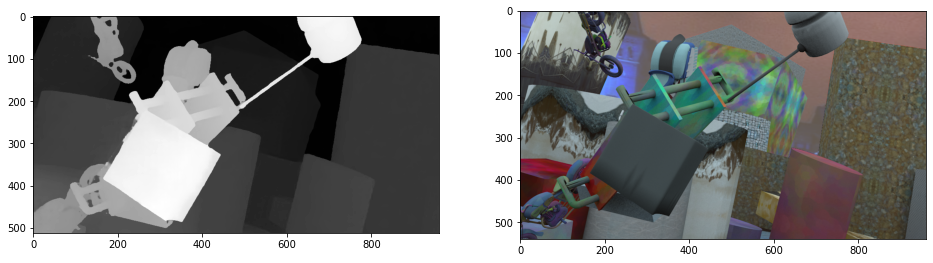

In [11]:
fig = plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.imshow(depth_img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(left_img, cmap="gray")